In [127]:
#!pip install -U imbalanced-learn

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dir = "F:\Thesis Material\Thesisdataset.xlsx"
dataset = pd.read_excel(dir)
dataset.head()

,1. Age in years,Gender,Placeofresidents,Race,EducationalLevel,OccupationalStatus,MaritalStatus,8. Family Income,1stquestion,2ndquestion,...,16thquestion,17thquestion,18thquestion,19thquestion,20thquestion,21stquestion,Agegroup,Depression,Stress,Anxiety
0,25,Female,Urban area,Malay,"Tertiary education (Degree, Master, PHD)",Full-time,Single,"Less than RM 4, 849",1,3,...,1,1,3,1,2,1,21-25,Yes,Yes,Yes
1,23,Female,Rural area,Others,"Tertiary education (Degree, Master, PHD)",Student,Single,"Between RM 4, 850 to RM 10, 959",2,0,...,1,1,0,0,0,1,21-25,Yes,No,No
2,28,Female,Rural area,Malay,"Tertiary education (Degree, Master, PHD)",Full-time,Single,"Less than RM 4, 849",2,3,...,1,1,2,1,1,0,26-30,Yes,Yes,Yes
3,20,Female,Urban area,Malay,"Tertiary education (Degree, Master, PHD)",Student,Single,"More than RM 10,960",1,2,...,2,1,2,2,1,1,18-20,Yes,No,Yes
4,19,Female,Rural area,Malay,Post-secondary education (Pre-University : Mat...,Student,Single,"More than RM 10,960",1,1,...,0,0,1,0,1,0,18-20,No,No,Yes


In [3]:
inputs = dataset.drop(('1. Age in years'), axis = 'columns')
inputs.head()
df = inputs.drop('8. Family Income', axis = 'columns')
df.head()

,Gender,Placeofresidents,Race,EducationalLevel,OccupationalStatus,MaritalStatus,1stquestion,2ndquestion,3rdquestion,4thquestion,...,16thquestion,17thquestion,18thquestion,19thquestion,20thquestion,21stquestion,Agegroup,Depression,Stress,Anxiety
0,Female,Urban area,Malay,"Tertiary education (Degree, Master, PHD)",Full-time,Single,1,3,1,3,...,1,1,3,1,2,1,21-25,Yes,Yes,Yes
1,Female,Rural area,Others,"Tertiary education (Degree, Master, PHD)",Student,Single,2,0,0,0,...,1,1,0,0,0,1,21-25,Yes,No,No
2,Female,Rural area,Malay,"Tertiary education (Degree, Master, PHD)",Full-time,Single,2,3,1,2,...,1,1,2,1,1,0,26-30,Yes,Yes,Yes
3,Female,Urban area,Malay,"Tertiary education (Degree, Master, PHD)",Student,Single,1,2,1,1,...,2,1,2,2,1,1,18-20,Yes,No,Yes
4,Female,Rural area,Malay,Post-secondary education (Pre-University : Mat...,Student,Single,1,1,1,1,...,0,0,1,0,1,0,18-20,No,No,Yes


In [4]:
le_Gender = LabelEncoder()
le_Placeofresidents = LabelEncoder()
le_Race = LabelEncoder()
le_EducationalLevel = LabelEncoder()
le_OccupationalStatus = LabelEncoder()
le_MaritalStatus = LabelEncoder()
le_Agegroup = LabelEncoder()
le_Depression = LabelEncoder()
le_Stress = LabelEncoder()
le_Anxiety = LabelEncoder()

In [5]:
df['Gndr'] = le_Gender.fit_transform(df['Gender'])
df['Resident'] = le_Placeofresidents.fit_transform(df['Placeofresidents'])
df['RaceStat'] = le_Race.fit_transform(df['Race'])
df['Education'] = le_EducationalLevel.fit_transform(df['EducationalLevel'])
df['Occupation'] = le_OccupationalStatus.fit_transform(df['OccupationalStatus'])
df['Marriage'] = le_MaritalStatus.fit_transform(df['MaritalStatus'])
df['Age'] = le_Agegroup.fit_transform(df['Agegroup'])
df['Depressed'] = le_Depression.fit_transform(df['Depression'])
df['Stressed'] = le_Stress.fit_transform(df['Stress'])
df['Anex'] = le_Anxiety.fit_transform(df['Anxiety'])

df.head()

,Gender,Placeofresidents,Race,EducationalLevel,OccupationalStatus,MaritalStatus,1stquestion,2ndquestion,3rdquestion,4thquestion,...,Gndr,Resident,RaceStat,Education,Occupation,Marriage,Age,Depressed,Stressed,Anex
0,Female,Urban area,Malay,"Tertiary education (Degree, Master, PHD)",Full-time,Single,1,3,1,3,...,0,1,2,3,0,3,1,1,1,1
1,Female,Rural area,Others,"Tertiary education (Degree, Master, PHD)",Student,Single,2,0,0,0,...,0,0,3,3,2,3,1,1,0,0
2,Female,Rural area,Malay,"Tertiary education (Degree, Master, PHD)",Full-time,Single,2,3,1,2,...,0,0,2,3,0,3,2,1,1,1
3,Female,Urban area,Malay,"Tertiary education (Degree, Master, PHD)",Student,Single,1,2,1,1,...,0,1,2,3,2,3,0,1,0,1
4,Female,Rural area,Malay,Post-secondary education (Pre-University : Mat...,Student,Single,1,1,1,1,...,0,0,2,1,2,3,0,0,0,1


In [6]:
fdf = df.drop(['Gender', 'Placeofresidents', 'Race', 'EducationalLevel', 'OccupationalStatus', 'MaritalStatus', 'Agegroup', 'Depression', 'Stress', 'Anxiety'], axis='columns')
fdf.head()

,1stquestion,2ndquestion,3rdquestion,4thquestion,5thquestion,6thquestion,7thquestion,8thquestion,9thquestion,10thquestion,...,Gndr,Resident,RaceStat,Education,Occupation,Marriage,Age,Depressed,Stressed,Anex
0,1,3,1,3,1,0,2,1,1,0,...,0,1,2,3,0,3,1,1,1,1
1,2,0,0,0,1,1,0,1,1,1,...,0,0,3,3,2,3,1,1,0,0
2,2,3,1,2,1,3,3,1,2,3,...,0,0,2,3,0,3,2,1,1,1
3,1,2,1,1,2,1,1,0,2,2,...,0,1,2,3,2,3,0,1,0,1
4,1,1,1,1,0,1,1,1,2,1,...,0,0,2,1,2,3,0,0,0,1


In [7]:
Depress=['Gndr','Resident','RaceStat','Education','Occupation','Marriage','Age','3rdquestion', '5thquestion', '10thquestion', '13thquestion' , '16thquestion', '17thquestion', '21stquestion']

In [8]:
Strs=['Gndr','Resident','RaceStat','Education','Occupation','Marriage','Age', '1stquestion', '6thquestion', '8thquestion', '11thquestion', '12thquestion','14thquestion', '18thquestion']

In [9]:
Anx=['Gndr','Resident','RaceStat','Education','Occupation','Marriage','Age', '2ndquestion', '4thquestion', '7thquestion', '9thquestion', '15thquestion', '20thquestion', '19thquestion']

In [13]:
x = df[Depress].copy()
x.columns

Index(['Gndr', 'Resident', 'RaceStat', 'Education', 'Occupation', 'Marriage',
       'Age', '3rdquestion', '5thquestion', '10thquestion', '13thquestion',
       '16thquestion', '17thquestion', '21stquestion'],
      dtype='object')

In [10]:
cy=['Depressed']
y=df[cy].copy()
y.columns

Index(['Depressed'], dtype='object')

<AxesSubplot:ylabel='Depressed'>

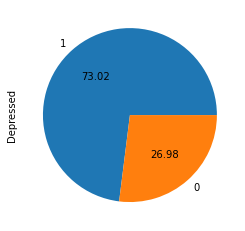

In [11]:
y['Depressed'].value_counts().plot.pie(autopct='%.2f')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.9, random_state = 0)

<AxesSubplot:ylabel='None'>

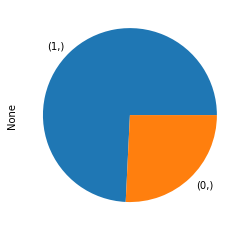

In [15]:
y_train.value_counts().plot.pie()

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train) 

<AxesSubplot:ylabel='None'>

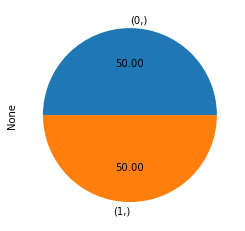

In [17]:
y_train_new.value_counts().plot.pie(autopct='%.2f')

In [19]:
x = tree.DecisionTreeClassifier()
x.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

In [20]:
y_predicted = x.predict(X_test)

In [21]:
accuracy_score(y_test, y_predicted)

0.8947368421052632

In [22]:
confusion_matrix(y_test, y_predicted)

array([[180,  57],
       [ 35, 602]], dtype=int64)

In [23]:
x1 = df[Strs].copy()
x1.columns

Index(['Gndr', 'Resident', 'RaceStat', 'Education', 'Occupation', 'Marriage',
       'Age', '1stquestion', '6thquestion', '8thquestion', '11thquestion',
       '12thquestion', '14thquestion', '18thquestion'],
      dtype='object')

In [24]:
x2 = df[Anx].copy()
x2.columns

Index(['Gndr', 'Resident', 'RaceStat', 'Education', 'Occupation', 'Marriage',
       'Age', '2ndquestion', '4thquestion', '7thquestion', '9thquestion',
       '15thquestion', '20thquestion', '19thquestion'],
      dtype='object')

In [25]:
cy1=['Stressed']
y1=df[cy1].copy()
y1.columns

Index(['Stressed'], dtype='object')

In [26]:
cy2=['Anex']
y2=df[cy2].copy()
y2.columns

Index(['Anex'], dtype='object')

In [27]:
y1['Stressed'].value_counts()

1    560
0    411
Name: Stressed, dtype: int64

In [28]:
y2['Anex'].value_counts()

1    770
0    201
Name: Anex, dtype: int64

In [29]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(x1, y1,test_size = 0.9, random_state = 1)

In [30]:
X_train_new1, y_train_new1 = sm.fit_resample(X_train_n, y_train_n)

In [31]:
X_train_ne, X_test_ne, y_train_ne, y_test_ne = train_test_split(x2, y2,test_size = 0.9, random_state = 1)

In [32]:
X_train_new2, y_train_new2 = sm.fit_resample(X_train_ne, y_train_ne)

In [33]:
x1 = tree.DecisionTreeClassifier()
x1.fit(X_train_new1, y_train_new1)

DecisionTreeClassifier()

In [34]:
y1_predicted = x1.predict(X_test_n)

In [35]:
accuracy_score(y_test_n, y1_predicted)

0.8844393592677345

In [36]:
x2 = tree.DecisionTreeClassifier()
x2.fit(X_train_ne, y_train_ne)

DecisionTreeClassifier()

In [37]:
y2_predicted = x2.predict(X_test_ne)

In [39]:
accuracy_score(y_test_ne, y2_predicted)

0.8901601830663616

In [31]:
#######Depression ends here########

Index(['Gndr', 'Resident', 'RaceStat', 'Education', 'Occupation', 'Marriage',
       'Age', '3rdquestion', '5thquestion', '10thquestion', '13thquestion',
       '16thquestion', '17thquestion', '21stquestion'],
      dtype='object')

Index(['Gndr', 'Resident', 'RaceStat', 'Education', 'Occupation', 'Marriage',
       'Age', '1stquestion', '6thquestion', '8thquestion', '11thquestion',
       '12thquestion', '14thquestion', '18thquestion'],
      dtype='object')

In [35]:
x5 = df[Anx].copy()
x5.columns

Index(['Gndr', 'Resident', 'RaceStat', 'Education', 'Occupation', 'Marriage',
       'Age', '2ndquestion', '4thquestion', '7thquestion', '9thquestion',
       '15thquestion', '20thquestion', '19thquestion'],
      dtype='object')

In [175]:
x3 = SVC()

In [176]:
x4 = SVC()

In [177]:
x5 = SVC()

In [178]:
x3.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [179]:
x4.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [180]:
x5.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [181]:
y_pred = x3.predict(X_test)

In [182]:
y1_pred = x4.predict(X_test)

In [183]:
y2_pred = x5.predict(X_test)

In [184]:
score_depress = accuracy_score(y_pred, y_test)

In [185]:
score_stress = accuracy_score(y1_pred, y_test)

In [186]:
score_Anx = accuracy_score(y2_pred, y_test)

In [187]:
print(score_depress)

0.9668192219679634


In [188]:
print(score_stress)

0.9668192219679634


In [155]:
print(score_Anx)

0.9668192219679634
